# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4" data-toc-modified-id="Rotación-de-P4-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rotación de P4</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final</a></div>

# Determinación de los parámetros de los polarizadores lineales

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   21/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 LPNIRE100-B.
1. Polarizador 4 LPNIRE100-B.

We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

\begin{equation}
P_L(0)=\left[\begin{array}{cc}
p_1 & 0  \\
0 & p_2
\end{array}\right]
\end{equation}

After this formalism, we pass to Mueller using Jones-Mueller Transformation

**Procedimiento**:

Una vez conocido el angulo de P1, se pone horizontal a la superficie. 

1. Se gira el polarizador P4 una vuelta.

**Teoría**

We rotate polarizer 4 in order to determine the polarization parameters of LPNIRE100-B. 

**Resultado**

1. Posición del ángulo de P4 respecto a P1
1. Parámetros de P1 a partir del valor máximo y mínimo de intensidad


El ángulo de P1 donde haya máxima intensidad es aquel alineado con el suelo.

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

## Tarjeta de adquisición de datos

In [9]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [10]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

## Parametros iniciales

In [14]:
from polarimeter.polarimeter import get_polarimeter_parameters, degrees, degrees_motor

config_dicts=get_polarimeter_parameters(kind='exp')

pol1,pol2,pol3,pol4=config_dicts
theta1=pol1['theta_axis']
theta4=pol4['theta_axis']

print("theta_1={}º, theta_4={}º".format(theta1/degrees, theta4/degrees))

theta_1=2.788º, theta_4=161.88º


## Motores

In [11]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]


In [12]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



## Rotación de P4 - referencia motor


In [16]:
motors.move(
        positions=[theta1/degrees, 0, 0, theta4/degrees], velocities=Vels, kind='absolute', verbose=False)
motors.get_position()
get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True);

current positions = ([ 2.795], [-0.], [-0.], [ 161.889])
1.3419, 

In [17]:
num_data=90
angles=sp.linspace(0,360,num_data)
intensities_2=sp.zeros_like(angles,dtype=float)

In [18]:
for i, angle in enumerate(angles):
    motors.move(
        positions=[theta1/degrees, 0, 0, angle], velocities=Vels, verbose=False)
    intensities_2[i]=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

1.2088, 1.1474, 1.0758, 1.0041, 0.9172, 0.8302, 0.7381, 0.6460, 0.5590, 0.4720, 0.3850, 0.3082, 0.2417, 0.1803, 0.1343, 0.0933, 0.0626, 0.0524, 0.0524, 0.0626, 0.0831, 0.1240, 0.1752, 0.2315, 0.2980, 0.3748, 0.4618, 0.5436, 0.6306, 0.7227, 0.8148, 0.9018, 0.9837, 1.0655, 1.1372, 1.2037, 1.2497, 1.2907, 1.3265, 1.3419, 1.3419, 1.3367, 1.3163, 1.2805, 1.2344, 1.1883, 1.1167, 1.0348, 0.9581, 0.8762, 0.7841, 0.6971, 0.6050, 0.5180, 0.4311, 0.3492, 0.2724, 0.2110, 0.1547, 0.1138, 0.0780, 0.0575, 0.0473, 0.0575, 0.0780, 0.1087, 0.1496, 0.2008, 0.2622, 0.3338, 0.4106, 0.5027, 0.5897, 0.6767, 0.7688, 0.8609, 0.9479, 1.0246, 1.1065, 1.1679, 1.2293, 1.2753, 1.3060, 1.3316, 1.3419, 1.3419, 1.3265, 1.3009, 1.2600, 1.2139, 

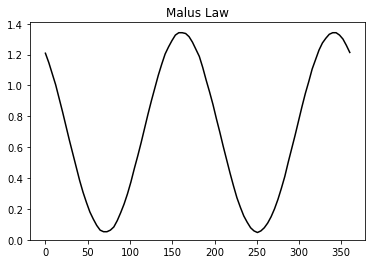

In [19]:
filename="step4_parametros_P4_absolute_{}".format(datetime.date.today())

plt.figure()
plt.plot(angles, intensities_2,'k')
plt.title('Malus Law')
plt.ylim(0,intensities_2.max()*1.05)
plt.savefig(filename+'.pdf')

In [20]:
np.save(filename+'.npy', np.array([angles, intensities_2]).transpose())
np.savetxt(filename+'.txt', np.array([angles, intensities_2]).transpose() )
savemat(filename+'.mat', {'angles': angles, 'intensities_2': intensities_2})

## Rotación de P4 - referencia polarizador


In [21]:
motors.move(
        positions=[0, 0, 0, 0], velocities=Vels, kind='polarizer', verbose=False)
motors.get_position()
get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True);

axis polarizer = 2.7880 degrees
axis polarizer = 0.0000 degrees
axis polarizer = 0.0000 degrees
axis polarizer = 161.8800 degrees
current positions = ([ 2.795], [-0.], [-0.], [ 161.889])
1.3470, 

In [22]:
num_data=90
angles=sp.linspace(0,360,num_data)
intensities_2=sp.zeros_like(angles,dtype=float)

In [25]:
for i, angle in enumerate(angles):
    motors.move(
        positions=[0, 0, 0, angle], velocities=Vels, kind='polarizer',  verbose=False)
    intensities_2[i]=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

1.3470, 1.3367, 1.3112, 1.2856, 1.2395, 1.1781, 1.1116, 1.0400, 0.9581, 0.8762, 0.7841, 0.6971, 0.6050, 0.5180, 0.4311, 0.3492, 0.2724, 0.2110, 0.1547, 0.1087, 0.0780, 0.0575, 0.0473, 0.0575, 0.0729, 0.1036, 0.1496, 0.2059, 0.2673, 0.3390, 0.4157, 0.5027, 0.5897, 0.6818, 0.7739, 0.8660, 0.9479, 1.0297, 1.1065, 1.1730, 1.2293, 1.2753, 1.3112, 1.3316, 1.3419, 1.3419, 1.3265, 1.3009, 1.2600, 1.2088, 1.1474, 1.0758, 0.9990, 0.9172, 0.8302, 0.7329, 0.6460, 0.5590, 0.4720, 0.3850, 0.3082, 0.2366, 0.1803, 0.1343, 0.0933, 0.0626, 0.0524, 0.0524, 0.0626, 0.0882, 0.1292, 0.1752, 0.2315, 0.3031, 0.3799, 0.4669, 0.5487, 0.6357, 0.7278, 0.8199, 0.9018, 0.9888, 1.0707, 1.1372, 1.2037, 1.2600, 1.2958, 1.3265, 1.3419, 1.3470, 

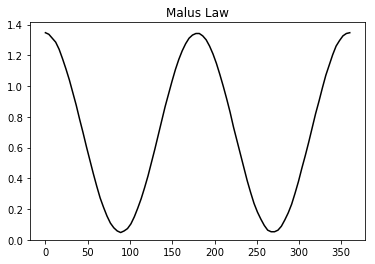

In [26]:
filename="step4_parametros_P4_polarizer_{}".format(datetime.date.today())

plt.figure()
plt.plot(angles, intensities_2,'k')
plt.title('Malus Law')
plt.ylim(0,intensities_2.max()*1.05)
plt.savefig(filename+'.pdf')

In [29]:
np.save(filename+'.npy', np.array([angles, intensities_2]).transpose())
np.savetxt(filename+'.txt', np.array([angles, intensities_2]).transpose() )
savemat(filename+'.mat', {'angles': angles, 'intensities_2': intensities_2})

## Final

In [27]:
motors.close()
del motors
LabJackPython.Close()

In [28]:
LabJackPython.Close()